## 1. Tải dữ liệu Dataset từ Kaggle

In [49]:
# Tải Dataset từ Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/bookcrossing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bookcrossing-dataset' dataset.
Path to dataset files: /kaggle/input/bookcrossing-dataset


## 2. Chọn đường dẫn tới thư mục Dataset

In [50]:
# Điều hướng đường dẫn tới nơi chứa Dataset
import os
path_dataset_original = os.path.join(path, "Book reviews")
path_dataset_original = os.path.join(path_dataset_original, "Book reviews")
path_dataset_preprocessed = os.path.join(path, "Books Data with Category Language and Summary")
print("Dữ liệu chưa tiền xử lý:",os.listdir(path_dataset_original))
print("Dữ liệu đã tiền xử lý:", os.listdir(path_dataset_preprocessed))


Dữ liệu chưa tiền xử lý: ['BX_Books.csv', 'BX-Book-Ratings.csv', 'BX-Users.csv']
Dữ liệu đã tiền xử lý: ['Preprocessed_data.csv']


## 3. Tiền xử lý dữ liệu

## 4. Xây dựng Model Recommendation

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [52]:
# Đọc dữ liệu
path_dataset = os.path.join(path_dataset_preprocessed, "Preprocessed_data.csv")
print(path_dataset)
df = pd.read_csv(path_dataset, index_col="Unnamed: 0")
df.head(10)

/kaggle/input/bookcrossing-dataset/Books Data with Category Language and Summary/Preprocessed_data.csv


,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada
5,67544,"toronto, ontario, canada",30.0000,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada
6,85526,"victoria, british columbia, canada",36.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],victoria,british columbia,canada
7,96054,"ottawa, ontario, canada",29.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
8,116866,"ottawa, ,",34.7439,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,",",NaN
9,123629,"kingston, ontario, canada",34.7439,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],kingston,ontario,canada


In [53]:
# Kích thước tập dữ liệu
df.shape

(1031175, 18)

In [54]:
# Xem danh sách các cột có trong dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031175 entries, 0 to 1031174
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1031175 non-null  int64  
 1   location             1031175 non-null  object 
 2   age                  1031175 non-null  float64
 3   isbn                 1031175 non-null  object 
 4   rating               1031175 non-null  int64  
 5   book_title           1031175 non-null  object 
 6   book_author          1031174 non-null  object 
 7   year_of_publication  1031175 non-null  float64
 8   publisher            1031175 non-null  object 
 9   img_s                1031175 non-null  object 
 10  img_m                1031175 non-null  object 
 11  img_l                1031175 non-null  object 
 12  Summary              1031175 non-null  object 
 13  Language             1031175 non-null  object 
 14  Category             1031175 non-null  object 
 15  cit

In [55]:
# Xem mối tương quan giữa các cột dữ liệu
df.describe()

,user_id,age,rating,year_of_publication
count,1.031175e+06,1.031175e+06,1.031175e+06,1.031175e+06
mean,1.405944e+05,3.642902e+01,2.839022e+00,1.995283e+03
std,8.052444e+04,1.035354e+01,3.854149e+00,7.309340e+00
min,2.000000e+00,5.000000e+00,0.000000e+00,1.376000e+03
25%,7.041500e+04,3.100000e+01,0.000000e+00,1.992000e+03
50%,1.412100e+05,3.474390e+01,0.000000e+00,1.997000e+03
75%,2.114260e+05,4.100000e+01,7.000000e+00,2.001000e+03
max,2.788540e+05,9.900000e+01,1.000000e+01,2.008000e+03


In [56]:
print(df["rating"].value_counts())

rating
0     647323
8      91806
10     71227
7      66404
9      60780
5      45355
6      31689
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64


In [57]:
# Ép kiểu cho chắc
df["user_id"] = df["user_id"].astype(int).astype(str)   # convert sang string cho nhất quán
df["isbn"] = df["isbn"].astype(str)
df["rating"] = df["rating"].astype(float)

print("\nSau khi chuẩn hóa kiểu dữ liệu:")
print(df.dtypes[["user_id", "isbn", "rating", "age", "year_of_publication"]])


Sau khi chuẩn hóa kiểu dữ liệu:
user_id                 object
isbn                    object
rating                 float64
age                    float64
year_of_publication    float64
dtype: object


### 3.2 Trực quan hóa

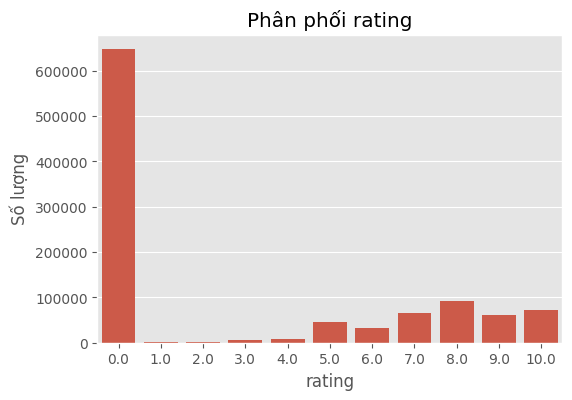

count    1.031175e+06
mean     2.839022e+00
std      3.854149e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: rating, dtype: float64


In [58]:
# 1. Phân phối rating
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="rating")
plt.title("Phân phối rating")
plt.xlabel("rating")
plt.ylabel("Số lượng")
plt.show()

print(df["rating"].describe())

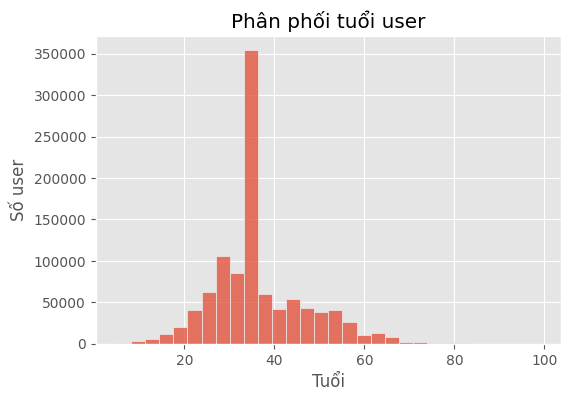

count    1.031175e+06
mean     3.642902e+01
std      1.035354e+01
min      5.000000e+00
25%      3.100000e+01
50%      3.474390e+01
75%      4.100000e+01
max      9.900000e+01
Name: age, dtype: float64


In [59]:
# 2. Phân phối tuổi
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=30, kde=False)
plt.title("Phân phối tuổi user")
plt.xlabel("Tuổi")
plt.ylabel("Số user")
plt.show()

print(df["age"].describe())

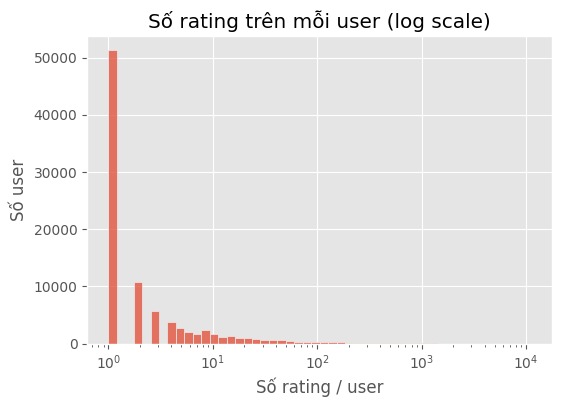

Thống kê số rating / user:
count    92107.000000
mean        11.195403
std         88.687288
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max      11144.000000
Name: count, dtype: float64


In [60]:
# 3. Số rating / user
user_counts = df["user_id"].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(user_counts, bins=50, log_scale=True)
plt.title("Số rating trên mỗi user (log scale)")
plt.xlabel("Số rating / user")
plt.ylabel("Số user")
plt.show()


print("Thống kê số rating / user:")
print(user_counts.describe())

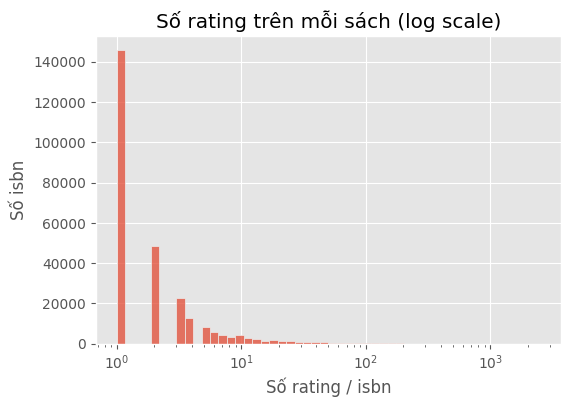

Thống kê số rating / sách:
count    270170.000000
mean          3.816764
std          13.811221
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: count, dtype: float64


In [61]:
# 4. Số rating / sách
item_counts = df["isbn"].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(item_counts, bins=50, log_scale=True)
plt.title("Số rating trên mỗi sách (log scale)")
plt.xlabel("Số rating / isbn")
plt.ylabel("Số isbn")
plt.show()

print("Thống kê số rating / sách:")
print(item_counts.describe())

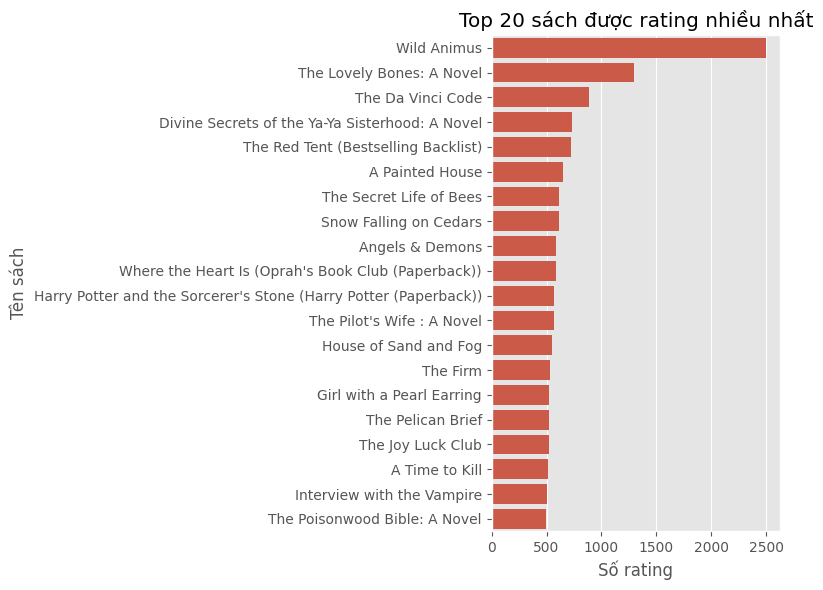

,isbn,book_title,num_ratings
215968,0971880107,Wild Animus,2502
38572,0316666343,The Lovely Bones: A Novel,1295
70803,0385504209,The Da Vinci Code,883
7345,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
32372,0312195516,The Red Tent (Bestselling Backlist),723
87405,044023722X,A Painted House,647
21344,0142001740,The Secret Life of Bees,615
145052,067976402X,Snow Falling on Cedars,614
133152,0671027360,Angels & Demons,586
93856,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,585


In [62]:
# 5. Top 20 sách được rating nhiều nhất
top_books = (
    df.groupby(["isbn", "book_title"])["rating"]
      .count()
      .reset_index(name="num_ratings")
      .sort_values("num_ratings", ascending=False)
      .head(20)
)

plt.figure(figsize=(8,6))
sns.barplot(y="book_title", x="num_ratings", data=top_books)
plt.title("Top 20 sách được rating nhiều nhất")
plt.xlabel("Số rating")
plt.ylabel("Tên sách")
plt.tight_layout()
plt.show()

top_books

### 3.3 Làm sạch thêm & lọc user/item

In [63]:
# Bỏ rating = 0 (coi như chưa rating)
df = df[df["rating"] > 0].copy()
print("Sau khi bỏ rating=0:", df.shape)

# Có thể lọc tuổi bất thường nếu muốn (tuỳ bạn)
df = df[(df["age"] >= 5) & (df["age"] <= 100)]

# Lọc user / item ít tương tác
min_user_ratings = 10     # mềm hơn 200
min_item_ratings = 10     # mềm hơn 100

df_f = df.copy()
user_counts = df_f["user_id"].value_counts()
item_counts = df_f["isbn"].value_counts()

df_f = df_f[df_f["user_id"].isin(user_counts[user_counts >= min_user_ratings].index)]
df_f = df_f[df_f["isbn"].isin(item_counts[item_counts >= min_item_ratings].index)]
df_f = df_f.reset_index(drop=True)

print("Sau khi lọc:")
print("  Số user  :", df_f["user_id"].nunique())
print("  Số isbn  :", df_f["isbn"].nunique())
print("  Số rating:", len(df_f))

Sau khi bỏ rating=0: (383852, 18)
Sau khi lọc:
  Số user  : 6318
  Số isbn  : 5438
  Số rating: 87178


### 3.4 Model KNN

In [64]:
# Dùng subset cho KNN: chỉ cần user_id, isbn, book_title, rating
ratings_knn = df_f[["user_id", "isbn", "book_title", "rating"]].copy()

# Pivot: hàng = isbn, cột = user_id, value = rating
user_item_matrix = ratings_knn.pivot_table(
    index="isbn",
    columns="user_id",
    values="rating",
    aggfunc="mean"
).fillna(0.0)

print("Kích thước ma trận (item x user):", user_item_matrix.shape)

# Convert sang sparse
user_item_sparse = csr_matrix(user_item_matrix.values)

# Fit KNN model
knn_model = NearestNeighbors(
    metric="cosine",
    algorithm="brute"
)
knn_model.fit(user_item_sparse)

# Mapping isbn -> book_title
isbn_to_title = (
    df_f[["isbn", "book_title"]]
    .drop_duplicates("isbn")
    .set_index("isbn")["book_title"]
    .to_dict()
)

Kích thước ma trận (item x user): (5438, 6318)


### 3.5 Hàm tìm sách tương tự

In [65]:
def similar_books_by_isbn(query_isbn, n_neighbors=6):
    """
    Tìm sách tương tự 1 isbn dựa trên KNN (item-based CF).
    """
    if query_isbn not in user_item_matrix.index:
        print(f"ISBN {query_isbn} không có trong ma trận (sau khi lọc).")
        return

    query_index = user_item_matrix.index.get_loc(query_isbn)
    distances, indices = knn_model.kneighbors(
        user_item_matrix.iloc[query_index, :].values.reshape(1, -1),
        n_neighbors=n_neighbors
    )

    print(f"Recommendations for ISBN={query_isbn} | Title='{isbn_to_title.get(query_isbn, 'UNKNOWN')}':\n")
    for rank, (idx, dist) in enumerate(zip(indices.flatten()[1:], distances.flatten()[1:]), start=1):
        sim_isbn = user_item_matrix.index[idx]
        title = isbn_to_title.get(sim_isbn, "UNKNOWN")
        similarity = 1.0 - dist
        print(f"{rank}: [{sim_isbn}] {title}  | similarity={similarity:.4f}")


In [66]:
# Ví dụ: chọn random 1 isbn và xem sách tương tự
sample_isbn = user_item_matrix.index[0]
similar_books_by_isbn(sample_isbn, n_neighbors=6)

Recommendations for ISBN=0002558122 | Title='Angelas Ashes':

1: [8804342838] Due di due (Bestsellers)  | similarity=0.7071
2: [1844262553] Free  | similarity=0.7071
3: [1550544683] Jade Peony  | similarity=0.7071
4: [8817106100] Oceano Mare  | similarity=0.7071
5: [8807813025] Novocento, Un Monologo  | similarity=0.7071


### 3.6 Chuẩn bị index & dữ liệu MF

In [67]:

# Chuẩn bị dataframe cho MF (chỉ cần 3 cột)
mf_df = df_f[["user_id", "isbn", "rating"]].copy()

# Encode user_id, isbn sang index liên tục
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

mf_df["user_idx"] = user_encoder.fit_transform(mf_df["user_id"])
mf_df["item_idx"] = item_encoder.fit_transform(mf_df["isbn"])

n_users = mf_df["user_idx"].nunique()
n_items = mf_df["item_idx"].nunique()

print("Số user:", n_users)
print("Số item:", n_items)

# full_data: [user_idx, item_idx, rating]
full_data = mf_df[["user_idx", "item_idx", "rating"]].values.astype(np.float32)
print("full_data shape:", full_data.shape)

# Chia 80% train, 20% val
train_arr, val_arr = train_test_split(
    full_data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Train size:", train_arr.shape)
print("Val size  :", val_arr.shape)


Số user: 6318
Số item: 5438
full_data shape: (87178, 3)
Train size: (69742, 3)
Val size  : (17436, 3)


### 3.7 Hàm train MF bằng SGD (SVD-style)

In [68]:
# =========================
# CELL 6: HÀM EVALUATE & TRAIN MF (SVD-STYLE) VỚI TRAIN/VAL + TRAIN FULL
# =========================

def evaluate_rmse(model, data):
    """
    Tính RMSE cho 1 tập (data: [user_idx, item_idx, rating])
    """
    P, Q = model["P"], model["Q"]
    bu, bi, mu = model["bu"], model["bi"], model["mu"]

    se = 0.0
    for u, i, r in data:
        u = int(u); i = int(i)
        pred = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])
        se += (r - pred) ** 2
    return np.sqrt(se / len(data))


def train_mf_sgd_with_val(
    train_data,
    val_data,
    n_users,
    n_items,
    n_factors=32,
    n_epochs=10,
    lr=0.01,
    reg=0.02,
    seed=42,
    verbose=True
):
    """
    Train MF với tập train/val để chọn hyperparameter.
    train_data, val_data: np.array shape (N, 3) -> [user_idx, item_idx, rating]
    """
    rng = np.random.default_rng(seed)

    # Khởi tạo tham số
    P = 0.01 * rng.standard_normal((n_users, n_factors)).astype(np.float32)
    Q = 0.01 * rng.standard_normal((n_items, n_factors)).astype(np.float32)
    bu = np.zeros(n_users, dtype=np.float32)
    bi = np.zeros(n_items, dtype=np.float32)
    mu = train_data[:, 2].mean().astype(np.float32)

    N = train_data.shape[0]

    for epoch in range(n_epochs):
        # Xáo trộn thứ tự mẫu
        indices = np.arange(N)
        rng.shuffle(indices)

        se = 0.0  # sum squared error trên train

        for idx in indices:
            u = int(train_data[idx, 0])
            i = int(train_data[idx, 1])
            r = train_data[idx, 2]

            pu = P[u]
            qi = Q[i]

            # Dự đoán
            pred = mu + bu[u] + bi[i] + np.dot(pu, qi)
            err = r - pred

            se += err * err

            # Cập nhật bias
            bu[u] += lr * (err - reg * bu[u])
            bi[i] += lr * (err - reg * bi[i])

            # Cập nhật latent factors
            P[u] += lr * (err * qi - reg * pu)
            Q[i] += lr * (err * pu - reg * qi)

        # Sau mỗi epoch: tính RMSE train & val
        train_rmse = np.sqrt(se / N)
        model = {
            "P": P,
            "Q": Q,
            "bu": bu,
            "bi": bi,
            "mu": mu,
            "n_factors": n_factors
        }
        val_rmse = evaluate_rmse(model, val_data)

        if verbose:
            print(
                f"Epoch {epoch+1}/{n_epochs} - "
                f"RMSE train: {train_rmse:.4f} | RMSE val: {val_rmse:.4f}"
            )

    return model


def train_mf_sgd_full(
    data,
    n_users,
    n_items,
    n_factors=32,
    n_epochs=10,
    lr=0.01,
    reg=0.02,
    seed=42,
    verbose=True
):
    """
    Train MF trên TOÀN BỘ data (không tách val).
    data: np.array shape (N, 3) -> [user_idx, item_idx, rating]
    """
    rng = np.random.default_rng(seed)

    # Khởi tạo tham số
    P = 0.01 * rng.standard_normal((n_users, n_factors)).astype(np.float32)
    Q = 0.01 * rng.standard_normal((n_items, n_factors)).astype(np.float32)
    bu = np.zeros(n_users, dtype=np.float32)
    bi = np.zeros(n_items, dtype=np.float32)
    mu = data[:, 2].mean().astype(np.float32)

    N = data.shape[0]

    for epoch in range(n_epochs):
        indices = np.arange(N)
        rng.shuffle(indices)

        se = 0.0

        for idx in indices:
            u = int(data[idx, 0])
            i = int(data[idx, 1])
            r = data[idx, 2]

            pu = P[u]
            qi = Q[i]

            pred = mu + bu[u] + bi[i] + np.dot(pu, qi)
            err = r - pred

            se += err * err

            # update bias
            bu[u] += lr * (err - reg * bu[u])
            bi[i] += lr * (err - reg * bi[i])

            # update latent factors
            P[u] += lr * (err * qi - reg * pu)
            Q[i] += lr * (err * pu - reg * qi)

        train_rmse = np.sqrt(se / N)
        if verbose:
            print(f"Epoch {epoch+1}/{n_epochs} - RMSE train (full): {train_rmse:.4f}")

    model = {
        "P": P,
        "Q": Q,
        "bu": bu,
        "bi": bi,
        "mu": mu,
        "n_factors": n_factors
    }
    return model


# ===== 1) Huấn luyện MF với train/val để đánh giá hyperparam =====
mf_model_val = train_mf_sgd_with_val(
    train_data=train_arr,
    val_data=val_arr,
    n_users=n_users,
    n_items=n_items,
    n_factors=32,   # bạn có thể thử 16, 32, 64
    n_epochs=10,    # tuỳ thời gian Colab
    lr=0.01,
    reg=0.02,
    verbose=True
)

print("Đã train xong model với train/val để đánh giá.")

# ===== 2) Sau khi đã ưng hyperparam -> train lại trên TOÀN BỘ mf_df =====
full_arr = mf_df[["user_idx", "item_idx", "rating"]].to_numpy(dtype=np.float32)
print("Full data shape:", full_arr.shape)

mf_model_full = train_mf_sgd_full(
    data=full_arr,
    n_users=n_users,
    n_items=n_items,
    n_factors=32,   # dùng cùng cấu hình đã test ở trên
    n_epochs=10,
    lr=0.01,
    reg=0.02,
    verbose=True
)

# Dùng model full làm model chính
mf_model = mf_model_full
print("Đã train xong MF trên toàn bộ dữ liệu và gán vào mf_model.")


Epoch 1/10 - RMSE train: 1.7096 | RMSE val: 1.6415
Epoch 2/10 - RMSE train: 1.6145 | RMSE val: 1.5974
Epoch 3/10 - RMSE train: 1.5621 | RMSE val: 1.5731
Epoch 4/10 - RMSE train: 1.5261 | RMSE val: 1.5580
Epoch 5/10 - RMSE train: 1.4992 | RMSE val: 1.5475
Epoch 6/10 - RMSE train: 1.4783 | RMSE val: 1.5404
Epoch 7/10 - RMSE train: 1.4610 | RMSE val: 1.5356
Epoch 8/10 - RMSE train: 1.4462 | RMSE val: 1.5320
Epoch 9/10 - RMSE train: 1.4323 | RMSE val: 1.5295
Epoch 10/10 - RMSE train: 1.4176 | RMSE val: 1.5281
Đã train xong model với train/val để đánh giá.
Full data shape: (87178, 3)
Epoch 1/10 - RMSE train (full): 1.6949
Epoch 2/10 - RMSE train (full): 1.5958
Epoch 3/10 - RMSE train (full): 1.5447
Epoch 4/10 - RMSE train (full): 1.5108
Epoch 5/10 - RMSE train (full): 1.4861
Epoch 6/10 - RMSE train (full): 1.4672
Epoch 7/10 - RMSE train (full): 1.4518
Epoch 8/10 - RMSE train (full): 1.4383
Epoch 9/10 - RMSE train (full): 1.4249
Epoch 10/10 - RMSE train (full): 1.4099
Đã train xong MF trên t

### 3.8 Hàm predict & recommend cho user

In [69]:
# =========================
# CELL PREDICT & RECOMMEND MF
# =========================

# Để tiện lấy meta sách cho recommend (từ df_f đã lọc)
item_meta = (
    df_f[["isbn", "book_title", "book_author", "publisher", "Language", "Category"]]
    .drop_duplicates("isbn")
    .reset_index(drop=True)
)

# Mapping ngược từ idx -> isbn
idx_to_isbn = item_encoder.inverse_transform(np.arange(n_items))

def _normalize_user_id(user_id_raw):
    """
    Đưa user_id_raw về cùng kiểu với user_encoder.classes_
    (tự nhận biết int hay str).
    """
    cls_dtype = user_encoder.classes_.dtype
    if np.issubdtype(cls_dtype, np.integer):
        return int(user_id_raw)
    else:
        return str(user_id_raw)

def _normalize_isbn(isbn_raw):
    """
    Đưa isbn_raw về cùng kiểu với item_encoder.classes_
    (đa số sẽ là str).
    """
    cls_dtype = item_encoder.classes_.dtype
    if np.issubdtype(cls_dtype, np.integer):
        return int(isbn_raw)
    else:
        return str(isbn_raw)

def predict_rating_mf(model, user_id_raw, isbn_raw, clip=True):
    """
    Dự đoán rating cho (user_id, isbn) bằng MF model.
    """
    user_id_key = _normalize_user_id(user_id_raw)
    isbn_key = _normalize_isbn(isbn_raw)

    if user_id_key not in user_encoder.classes_:
        raise ValueError("User không tồn tại trong tập train MF.")
    if isbn_key not in item_encoder.classes_:
        raise ValueError("ISBN không tồn tại trong tập train MF.")

    u = user_encoder.transform([user_id_key])[0]
    i = item_encoder.transform([isbn_key])[0]

    P, Q = model["P"], model["Q"]
    bu, bi, mu = model["bu"], model["bi"], model["mu"]

    pred = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])
    if clip:
        min_r = df_f["rating"].min()
        max_r = df_f["rating"].max()
        pred = float(np.clip(pred, min_r, max_r))
    return pred


def recommend_for_user_mf(model, user_id_raw, n_recs=10):
    """
    Gợi ý top-N sách cho 1 user (đã có trong train) bằng MF.
    """
    user_id_key = _normalize_user_id(user_id_raw)

    if user_id_key not in user_encoder.classes_:
        raise ValueError("User không tồn tại trong tập train MF.")

    u = user_encoder.transform([user_id_key])[0]
    P, Q = model["P"], model["Q"]
    bu, bi, mu = model["bu"], model["bi"], model["mu"]

    # predict cho tất cả item: scores = μ + bu[u] + bi + Q @ P[u]
    scores = mu + bu[u] + bi + Q @ P[u]

    # loại item user đã rating
    rated_item_indices = mf_df.loc[mf_df["user_id"] == user_id_key, "item_idx"].unique()
    scores[rated_item_indices] = -np.inf

    # chọn top-n
    n_recs = min(n_recs, len(scores))  # phòng trường hợp n_recs > số item
    candidate_indices = np.argpartition(-scores, n_recs)[:n_recs]
    candidate_indices = candidate_indices[np.argsort(-scores[candidate_indices])]

    candidate_isbns = idx_to_isbn[candidate_indices]
    candidate_scores = scores[candidate_indices]

    rec_df = pd.DataFrame({
        "isbn": candidate_isbns,
        "pred_rating": candidate_scores
    })

    rec_df = rec_df.merge(item_meta, on="isbn", how="left")
    rec_df = rec_df.sort_values("pred_rating", ascending=False)

    return rec_df[
        ["isbn", "book_title", "book_author",
         "publisher", "Language", "Category", "pred_rating"]
    ]


# Demo: chọn 1 user bất kỳ để kiểm tra model full
sample_user = mf_df["user_id"].iloc[0]
print("Sample user:", sample_user)

rec_df = recommend_for_user_mf(mf_model, sample_user, n_recs=10)
rec_df


Sample user: 11676


,isbn,book_title,book_author,publisher,Language,Category,pred_rating
0,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,Scholastic,en,['Juvenile Fiction'],9.071708
1,0836213319,Dilbert: A Book of Postcards,Scott Adams,Andrews McMeel Pub,9,9,9.014280
2,0836218620,Weirdos From Another Planet!,Bill Watterson,Andrews McMeel Publishing,en,['Humor'],8.922058
3,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,Houghton Mifflin Company,9,9,8.919458
4,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,Del Rey,9,9,8.892448
5,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,en,['Juvenile Fiction'],8.865683
6,0156012197,The Little Prince,Antoine de Saint-ExupÃ©ry,Harvest Books,en,['Juvenile Fiction'],8.813390
7,0345339703,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Del Rey,en,['Fiction'],8.772896
8,0836218787,Scientific Progress Goes 'Boink': A Calvin an...,Bill Watterson,Andrews McMeel Publishing,en,['Comics & Graphic Novels'],8.759432
9,0394800389,Fox in Socks (I Can Read It All by Myself Begi...,Dr. Seuss,Random House Children's Books,9,9,8.755244


### 3.9 Save Model


In [70]:
# =========================
# CELL 3: BUILD user_item_idx & SAVE ARTIFACT
# =========================

# user_item_idx: dùng cho recommend và API (để loại sách user đã đọc)
user_item_idx = mf_df[["user_id", "item_idx"]].drop_duplicates()

artifact = {
    "mf_model": mf_model,              # model đã train FULL dữ liệu
    "user_encoder": user_encoder,
    "item_encoder": item_encoder,
    "item_meta": item_meta,
    "user_item_idx": user_item_idx,
    "min_user_ratings": min_user_ratings,
    "min_item_ratings": min_item_ratings,
}

joblib.dump(artifact, "mf_book_recommender.pkl")
print("Đã lưu model FULL vào: mf_book_recommender.pkl")


Đã lưu model FULL vào: mf_book_recommender.pkl


## 4. Xây dựng API

In [71]:
!pip install fastapi uvicorn nest_asyncio pyngrok

### 4.1 Cấu hình ngrok

In [72]:
TOKEN = "35u5zpnY3Ho8KbdH0GKIZ6dMjYj_445FRvC5Qbhq53WFUjRRb"
from pyngrok import ngrok

NGROK_AUTH_TOKEN = TOKEN  # thay bằng token của bạn
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


### 4.2 Load model

In [73]:
from fastapi import FastAPI, HTTPException, Query
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from typing import List

import numpy as np
import pandas as pd
import joblib


In [74]:
# ----- 1.1. Load artifact MF đã train -----
# Giả sử bạn đã lưu ở đường dẫn này, nếu khác thì sửa lại
artifact_path = "/content/mf_book_recommender.pkl"
artifact = joblib.load(artifact_path)

mf_model = artifact["mf_model"]
user_encoder = artifact["user_encoder"]
item_encoder = artifact["item_encoder"]
item_meta_artifact = artifact["item_meta"]      # meta cũ khi train MF
user_item_idx = artifact["user_item_idx"]      # user_id, item_idx (để loại sách đã đọc)


P = mf_model["P"]          # (n_users, n_factors)
Q = mf_model["Q"]          # (n_items, n_factors)
bu = mf_model["bu"]        # (n_users,)
bi = mf_model["bi"]        # (n_items,)
mu = mf_model["mu"]        # scalar

n_items = Q.shape[0]
idx_to_isbn = item_encoder.inverse_transform(np.arange(n_items))


### 4.3 Tạo CSDL bằng file csv

In [83]:
# ----- 1.2. Load CSV gốc, tạo "csdl" sách (đÃ LỌC GIỐNG LÚC TRAIN MF) -----
csv_path = "/root/.cache/kagglehub/datasets/ruchi798/bookcrossing-dataset/versions/3/Books Data with Category Language and Summary/Preprocessed_data.csv"
df_raw = pd.read_csv(csv_path)

# Đảm bảo isbn cùng kiểu với item_encoder
df_raw["isbn"] = df_raw["isbn"].astype(str)
encoder_isbns = pd.Series(item_encoder.classes_).astype(str)
valid_isbns = set(encoder_isbns)

# LỌC: chỉ giữ các bản ghi có isbn đã được dùng trong MF (nằm trong item_encoder)
df_raw = df_raw[df_raw["isbn"].isin(valid_isbns)].copy()
print("Số bản ghi sau khi align với MF (chỉ giữ isbn có trong item_encoder):", df_raw.shape)

# DataFrame books: mỗi ISBN một dòng, kèm meta, ảnh, summary
books_df = (
    df_raw[
        [
            "isbn",
            "book_title",
            "book_author",
            "publisher",
            "Language",
            "Category",
            "year_of_publication",
            "img_s",
            "img_m",
            "img_l",
            "Summary",
        ]
    ]
    .drop_duplicates("isbn")
    .reset_index(drop=True)
)

# Thống kê rating: số lượng và trung bình rating cho từng sách
rating_stats = (
    df_raw.groupby("isbn")["rating"]
    .agg(["count", "mean"])
    .reset_index()
    .rename(columns={"count": "rating_count", "mean": "rating_mean"})
)

# Gộp thống kê vào books_df
books_df = books_df.merge(rating_stats, on="isbn", how="left")

# Đảm bảo có dtype hợp lý
books_df["rating_count"] = books_df["rating_count"].fillna(0).astype(int)
books_df["rating_mean"] = books_df["rating_mean"].astype(float)

# ----- 1.3. Chuẩn hoá lại item_meta dùng cho recommend (đồng bộ với books_df) -----
item_meta = (
    books_df[
        [
            "isbn",
            "book_title",
            "book_author",
            "publisher",
            "Language",
            "Category",
        ]
    ]
    .drop_duplicates("isbn")
    .reset_index(drop=True)
)

# ----- 1.4. Tiền xử lý trước cho tính tương đồng item (similar books) -----
# Chuẩn hoá vector Q để dùng cosine similarity nhanh
Q_norm = Q.copy().astype(np.float32)
norms = np.linalg.norm(Q_norm, axis=1, keepdims=True) + 1e-8
Q_norm /= norms

print("Loaded MF model, encoders, and built books_df with shape:", books_df.shape)
print("Số ISBN trong books_df:", books_df["isbn"].nunique(),
      "| Số ISBN trong item_encoder:", len(item_encoder.classes_))


Số bản ghi sau khi align với MF (chỉ giữ isbn có trong item_encoder): (336242, 19)
Loaded MF model, encoders, and built books_df with shape: (5438, 13)
Số ISBN trong books_df: 5438 | Số ISBN trong item_encoder: 5438


### 4.4 Xây dựng API

In [91]:
# ----- 2.1. Pydantic models cho response -----

class BookItem(BaseModel):
    isbn: str
    book_title: str | None = None
    book_author: str | None = None
    publisher: str | None = None
    language: str | None = None
    category: str | None = None
    year_of_publication: float | None = None
    img_s: str | None = None
    img_m: str | None = None
    img_l: str | None = None
    summary: str | None = None
    rating_count: int | None = None
    rating_mean: float | None = None


class BookListResponse(BaseModel):
    page: int
    page_size: int
    total_items: int
    total_pages: int
    items: List[BookItem]


class Recommendation(BaseModel):
    isbn: str
    book_title: str | None = None
    book_author: str | None = None
    publisher: str | None = None
    language: str | None = None
    category: str | None = None
    predicted_rating: float
    img_s: str | None = None
    img_m: str | None = None


class RecommendResponse(BaseModel):
    user_id: int
    top_k: int
    items: List[Recommendation]


class PredictRequest(BaseModel):
    user_id: int
    isbn: str


class PredictResponse(BaseModel):
    user_id: int
    isbn: str
    predicted_rating: float


class SimilarBooksResponse(BaseModel):
    isbn: str
    top_k: int
    items: List[Recommendation]


# NEW: model cho user demo để scroll
class DemoUser(BaseModel):
    user_id: int
    n_ratings: int
    avg_rating: float | None = None
    top_categories: List[str] | None = None


# ----- 2.2. Helper functions -----

def _normalize_user_id(user_id_raw):
    """
    Chuẩn hoá user_id theo dtype của user_encoder (int hoặc str).
    """
    cls_dtype = user_encoder.classes_.dtype
    if np.issubdtype(cls_dtype, np.integer):
        return int(user_id_raw)
    else:
        return str(user_id_raw)


def _normalize_isbn(isbn_raw):
    """
    Chuẩn hoá isbn theo dtype của item_encoder (int hoặc str).
    """
    cls_dtype = item_encoder.classes_.dtype
    if np.issubdtype(cls_dtype, np.integer):
        return int(isbn_raw)
    else:
        return str(isbn_raw)


def paginate_df(df: pd.DataFrame, page: int, page_size: int):
    page = max(page, 1)
    page_size = max(min(page_size, 100), 1)  # giới hạn page_size <= 100

    total_items = len(df)
    total_pages = int(np.ceil(total_items / page_size)) if total_items > 0 else 1

    start = (page - 1) * page_size
    end = start + page_size

    return df.iloc[start:end].reset_index(drop=True), total_items, total_pages


def _predict_single(user_id_raw, isbn_raw, clip=True) -> float:
    """
    Dự đoán rating cho (user_id, isbn) bằng MF.
    """
    user_id_key = _normalize_user_id(user_id_raw)
    isbn_key = _normalize_isbn(isbn_raw)

    if user_id_key not in user_encoder.classes_:
        raise HTTPException(status_code=404, detail="User không tồn tại trong tập train MF.")
    if isbn_key not in item_encoder.classes_:
        raise HTTPException(status_code=404, detail="ISBN không tồn tại trong tập train MF.")

    u = user_encoder.transform([user_id_key])[0]
    i = item_encoder.transform([isbn_key])[0]

    pred = mu + bu[u] + bi[i] + np.dot(P[u], Q[i])

    if clip:
        pred = float(np.clip(pred, 1.0, 10.0))  # giả sử thang điểm 1–10

    return float(pred)


def _recommend_for_user(user_id_raw, top_k=10) -> pd.DataFrame:
    """
    Gợi ý top-k sách cho 1 user (đã có trong tập train MF).
    Trả về DataFrame có isbn, pred_rating + meta.
    """
    user_id_key = _normalize_user_id(user_id_raw)

    if user_id_key not in user_encoder.classes_:
        raise HTTPException(status_code=404, detail="User không tồn tại trong tập train MF.")

    u = user_encoder.transform([user_id_key])[0]

    # scores = μ + bu[u] + bi + Q @ P[u]
    scores = mu + bu[u] + bi + Q @ P[u]

    # Loại sách user đã rating trong train
    rated_item_indices = user_item_idx.loc[
        user_item_idx["user_id"] == user_id_key, "item_idx"
    ].unique()
    scores[rated_item_indices] = -np.inf

    # Lấy top-k
    top_k = min(top_k, len(scores))
    candidate_indices = np.argpartition(-scores, top_k)[:top_k]
    candidate_indices = candidate_indices[np.argsort(-scores[candidate_indices])]

    candidate_isbns = idx_to_isbn[candidate_indices]
    candidate_scores = scores[candidate_indices]

    rec_df = pd.DataFrame(
        {
            "isbn": candidate_isbns,
            "predicted_rating": candidate_scores,
        }
    )

    # Join với books_df để lấy thêm title, author, img...
    rec_df = rec_df.merge(
        books_df[
            [
                "isbn",
                "book_title",
                "book_author",
                "publisher",
                "Language",
                "Category",
                "img_s",
                "img_m",
            ]
        ],
        on="isbn",
        how="left",
    )

    rec_df = rec_df.sort_values("predicted_rating", ascending=False).reset_index(drop=True)
    return rec_df


def _similar_books(isbn_raw, top_k=10) -> pd.DataFrame:
    """
    Tìm sách tương tự 1 isbn dựa trên vector Q_norm (cosine similarity).
    """
    isbn_key = _normalize_isbn(isbn_raw)

    if isbn_key not in item_encoder.classes_:
        raise HTTPException(status_code=404, detail="ISBN không tồn tại trong tập train MF.")

    i = item_encoder.transform([isbn_key])[0]

    v = Q_norm[i]                      # (n_factors,)
    sims = Q_norm @ v                  # (n_items,)

    # Loại chính nó
    sims[i] = -np.inf

    top_k = min(top_k, len(sims))
    candidate_indices = np.argpartition(-sims, top_k)[:top_k]
    candidate_indices = candidate_indices[np.argsort(-sims[candidate_indices])]

    candidate_isbns = idx_to_isbn[candidate_indices]
    candidate_sims = sims[candidate_indices]

    sim_df = pd.DataFrame(
        {
            "isbn": candidate_isbns,
            "similarity": candidate_sims,
        }
    )

    sim_df = sim_df.merge(
        books_df[
            [
                "isbn",
                "book_title",
                "book_author",
                "publisher",
                "Language",
                "Category",
                "img_s",
                "img_m",
            ]
        ],
        on="isbn",
        how="left",
    )

    sim_df = sim_df.sort_values("similarity", ascending=False).reset_index(drop=True)
    return sim_df


# ----- 2.2bis. Chuẩn bị danh sách user demo cho scroll (/demo/users) -----

# Chuẩn hoá user_id trong df_raw theo dtype của user_encoder
cls_dtype = user_encoder.classes_.dtype

if np.issubdtype(cls_dtype, np.integer):
    df_raw["user_key"] = df_raw["user_id"].astype(int)
else:
    df_raw["user_key"] = df_raw["user_id"].astype(str)

valid_users = set(user_encoder.classes_)

# Lọc chỉ các bản ghi có user nằm trong MF
df_users_mf = df_raw[df_raw["user_key"].isin(valid_users)].copy()
print("Số bản ghi df_users_mf (sau align user với MF):", df_users_mf.shape)

# Thống kê số rating và trung bình rating cho mỗi user
user_stats = (
    df_users_mf.groupby("user_key")["rating"]
    .agg(["count", "mean"])
    .reset_index()
    .rename(columns={"user_key": "user_id", "count": "n_ratings", "mean": "avg_rating"})
)

# Thống kê top category cho mỗi user (lấy tối đa 3 category xuất hiện nhiều nhất)
user_cat_counts = (
    df_users_mf.groupby(["user_key", "Category"])
    .size()
    .reset_index(name="cnt")
)
user_cat_counts = user_cat_counts.sort_values(["user_key", "cnt"], ascending=[True, False])

top_k_cat = 3
top_cats = (
    user_cat_counts.groupby("user_key")
    .head(top_k_cat)
    .groupby("user_key")["Category"]
    .apply(list)
    .reset_index()
    .rename(columns={"user_key": "user_id", "Category": "top_categories"})
)

# Merge stats + top_categories
demo_users_df = user_stats.merge(top_cats, on="user_id", how="left")

# Lọc chỉ các user có nhiều rating nhất để demo scroll
DEMO_USER_MIN_RATINGS = 20   # tuỳ chỉnh
MAX_DEMO_USERS = 100

demo_users_df = demo_users_df[demo_users_df["n_ratings"] >= DEMO_USER_MIN_RATINGS].copy()
demo_users_df = (
    demo_users_df.sort_values("n_ratings", ascending=False)
    .head(MAX_DEMO_USERS)
    .reset_index(drop=True)
)

print("Số user demo:", demo_users_df.shape)
print(demo_users_df.head())


# ----- 2.3. Khởi tạo FastAPI app -----

app = FastAPI(
    title="Book Recommender API (Colab)",
    description="MF trên Preprocessed_data.csv",
    version="1.0.0",
)

# Cho FE local hoặc domain khác gọi (dev: cho * cho nhanh)
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)


# ----- 2.4. Định nghĩa các endpoints -----


@app.get("/health")
def health_check():
    return {"status": "ok"}


# NEW: danh sách user demo cho scroll
@app.get("/demo/users", response_model=List[DemoUser])
def list_demo_users():
    users: List[DemoUser] = []
    for row in demo_users_df.itertuples(index=False):
        top_cats_raw = getattr(row, "top_categories", None)

        if isinstance(top_cats_raw, list):
            cats = [str(c) for c in top_cats_raw]
        elif top_cats_raw is None or (isinstance(top_cats_raw, float) and pd.isna(top_cats_raw)):
            cats = None
        else:
            cats = [str(top_cats_raw)]

        users.append(
            DemoUser(
                user_id=int(row.user_id),
                n_ratings=int(row.n_ratings),
                avg_rating=float(row.avg_rating) if not pd.isna(row.avg_rating) else None,
                top_categories=cats,
            )
        )
    return users


# 1) List sách (catalog) với phân trang + filter cơ bản
@app.get("/books", response_model=BookListResponse)
def list_books(
    page: int = Query(1, ge=1),
    page_size: int = Query(20, ge=1, le=100),
    category: str | None = Query(None),
    language: str | None = Query(None),
    sort_by: str | None = Query(
        None, description="popularity | rating | year"
    ),
    order: str = Query("desc", pattern="^(asc|desc)$"),
):
    """
    Trả về danh sách sách (catalog) có phân trang.
    - category: lọc theo Category (contains, không phân biệt hoa thường)
    - language: lọc theo Language
    - sort_by: popularity (rating_count), rating (rating_mean), year (year_of_publication)
    - order: asc | desc
    """
    df = books_df.copy()

    if category:
        df = df[df["Category"].str.contains(category, case=False, na=False)]
    if language:
        df = df[df["Language"].str.contains(language, case=False, na=False)]

    ascending = order == "asc"
    if sort_by == "popularity":
        df = df.sort_values("rating_count", ascending=ascending)
    elif sort_by == "rating":
        df = df.sort_values("rating_mean", ascending=ascending)
    elif sort_by == "year":
        df = df.sort_values("year_of_publication", ascending=ascending)

    page_df, total_items, total_pages = paginate_df(df, page, page_size)

    items: List[BookItem] = []
    for row in page_df.itertuples(index=False):
        items.append(
            BookItem(
                isbn=row.isbn,
                book_title=row.book_title,
                book_author=row.book_author,
                publisher=row.publisher,
                language=row.Language,
                category=row.Category,
                year_of_publication=row.year_of_publication,
                img_s=row.img_s,
                img_m=row.img_m,
                img_l=row.img_l,
                summary=row.Summary,
                rating_count=int(row.rating_count) if not pd.isna(row.rating_count) else None,
                rating_mean=float(row.rating_mean) if not pd.isna(row.rating_mean) else None,
            )
        )

    return BookListResponse(
        page=page,
        page_size=page_size,
        total_items=total_items,
        total_pages=total_pages,
        items=items,
    )


# 2) Search sách theo title/author (realtime)
@app.get("/books/search", response_model=BookListResponse)
def search_books(
    q: str = Query(..., description="Từ khoá search (title/author)"),
    page: int = Query(1, ge=1),
    page_size: int = Query(20, ge=1, le=100),
):
    df = books_df.copy()

    mask = (
        df["book_title"].str.contains(q, case=False, na=False)
        | df["book_author"].str.contains(q, case=False, na=False)
    )
    df = df[mask]

    page_df, total_items, total_pages = paginate_df(df, page, page_size)

    items: List[BookItem] = []
    for row in page_df.itertuples(index=False):
        items.append(
            BookItem(
                isbn=row.isbn,
                book_title=row.book_title,
                book_author=row.book_author,
                publisher=row.publisher,
                language=row.Language,
                category=row.Category,
                year_of_publication=row.year_of_publication,
                img_s=row.img_s,
                img_m=row.img_m,
                img_l=row.img_l,
                summary=row.Summary,
                rating_count=int(row.rating_count) if not pd.isna(row.rating_count) else None,
                rating_mean=float(row.rating_mean) if not pd.isna(row.rating_mean) else None,
            )
        )

    return BookListResponse(
        page=page,
        page_size=page_size,
        total_items=total_items,
        total_pages=total_pages,
        items=items,
    )


# 3) Chi tiết 1 sách
@app.get("/books/{isbn}", response_model=BookItem)
def get_book_detail(isbn: str):
    isbn_key = _normalize_isbn(isbn)
    row = books_df[books_df["isbn"] == isbn_key]

    if row.empty:
        raise HTTPException(status_code=404, detail="Không tìm thấy sách.")

    row = row.iloc[0]

    return BookItem(
        isbn=row.isbn,
        book_title=row.book_title,
        book_author=row.book_author,
        publisher=row.publisher,
        language=row.Language,
        category=row.Category,
        year_of_publication=row.year_of_publication,
        img_s=row.img_s,
        img_m=row.img_m,
        img_l=row.img_l,
        summary=row.Summary,
        rating_count=int(row.rating_count) if not pd.isna(row.rating_count) else None,
        rating_mean=float(row.rating_mean) if not pd.isna(row.rating_mean) else None,
    )


# 4) Gợi ý sách tương tự 1 isbn
@app.get("/books/{isbn}/similar", response_model=SimilarBooksResponse)
def similar_books(isbn: str, top_k: int = Query(10, ge=1, le=50)):
    sim_df = _similar_books(isbn, top_k=top_k)

    items: List[Recommendation] = []
    for row in sim_df.itertuples(index=False):
        items.append(
            Recommendation(
                isbn=row.isbn,
                book_title=row.book_title,
                book_author=row.book_author,
                publisher=row.publisher,
                language=row.Language,
                category=row.Category,
                predicted_rating=float(row.similarity),  # dùng similarity như "score"
                img_s=row.img_s,
                img_m=row.img_m,
            )
        )

    return SimilarBooksResponse(
        isbn=_normalize_isbn(isbn),
        top_k=top_k,
        items=items,
    )


# 5) Gợi ý sách cho user
@app.get("/users/{user_id}/recommendations", response_model=RecommendResponse)
def recommend_for_user(user_id: int, top_k: int = Query(10, ge=1, le=50)):
    rec_df = _recommend_for_user(user_id, top_k=top_k)

    items: List[Recommendation] = []
    for row in rec_df.itertuples(index=False):
        items.append(
            Recommendation(
                isbn=row.isbn,
                book_title=row.book_title,
                book_author=row.book_author,
                publisher=row.publisher,
                language=row.Language,
                category=row.Category,
                predicted_rating=float(row.predicted_rating),
                img_s=row.img_s,
                img_m=row.img_m,
            )
        )

    return RecommendResponse(
        user_id=user_id,
        top_k=top_k,
        items=items,
    )


# 6) Dự đoán rating cho (user_id, isbn)
@app.post("/predict", response_model=PredictResponse)
def predict(req: PredictRequest):
    pred = _predict_single(req.user_id, req.isbn)
    return PredictResponse(
        user_id=req.user_id,
        isbn=req.isbn,
        predicted_rating=pred,
    )


Số bản ghi df_users_mf (sau align user với MF): (230279, 20)
Số user demo: (100, 4)
  user_id  n_ratings  avg_rating  \
0   11676       2856    5.068978   
1   35859       1226    1.097064   
2  153662        971    2.848610   
3   76352        954    0.185535   
4   16795        873    2.987400   

                                    top_categories  
0           [['Fiction'], 9, ['Juvenile Fiction']]  
1           [['Fiction'], 9, ['Juvenile Fiction']]  
2           [['Fiction'], 9, ['Juvenile Fiction']]  
3           [['Fiction'], 9, ['Juvenile Fiction']]  
4  [['Fiction'], 9, ['Biography & Autobiography']]  


## 5 Chạy server + mở link public

In [ ]:
import nest_asyncio
nest_asyncio.apply()

from pyngrok import ngrok
from uvicorn import Config, Server

# 1) Ngắt mọi tunnel cũ (nếu có) trên agent hiện tại
try:
    for t in ngrok.get_tunnels():
        print("Disconnect old tunnel:", t.public_url)
        ngrok.disconnect(t.public_url)
except Exception as e:
    print("Không lấy được danh sách tunnel cũ (có thể chưa có cái nào):", e)

# 2) Kill process ngrok cũ (nếu đang chạy)
ngrok.kill()

# 3) Mở tunnel HTTP mới tới port 8000
public_url = ngrok.connect(8000, "http")
print("Public URL :", public_url.public_url)
print("Swagger    :", public_url.public_url + "/docs")

# 4) Cấu hình Uvicorn server
config = Config(
    app=app,
    host="0.0.0.0",
    port=8000,
    log_level="info"
)
server = Server(config)

# 5) Chạy server (blocking trong cell này)
await server.serve()


Public URL : https://alla-designatory-griselda.ngrok-free.dev
Swagger    : https://alla-designatory-griselda.ngrok-free.dev/docs


INFO:     Started server process [186]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     2405:4802:1cd0:95f0:70a5:2eac:6236:b347:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2405:4802:1cd0:95f0:70a5:2eac:6236:b347:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     2405:4802:1cd0:95f0:70a5:2eac:6236:b347:0 - "GET /demo/users HTTP/1.1" 200 OK
INFO:     2405:4802:1cd0:95f0:70a5:2eac:6236:b347:0 - "GET /health HTTP/1.1" 200 OK
